In [2]:
# Python Project Template
# Remember to df.to_csv("periodic_backup.csv")   OFTEN!!!
# df.to_csv("auto_data_uk.csv")

# 1. Prepare Problem
# a) Load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("Numpy version: "+np.__version__)
print("sklearn version: "+sklearn.__version__)

Numpy version: 1.22.4
sklearn version: 1.2.1


In [3]:
!pip install pandas-profiling==3.2.0
!pip install markupsafe==2.0.1
# https://pypi.org/project/pandas-profiling/3.1.0/#history
import pandas as pd
from pandas_profiling import ProfileReport

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (30 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.2
    Uninstalling MarkupSafe-2.1.2:
      Successfully uninstalled MarkupSafe-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [4]:
df = pd.read_csv("movies.csv")
df.sample(5)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
349,El Camino: A Breaking Bad Movie,7.3,2019,October,TV-MA,122,Vince Gilligan,"Aaron Paul, Jonathan Banks, Matt Jones, Charle...","Action, Crime, Drama",USA,"$6,000,000",Unknown,United States
287,The Dry,6.8,2020,May,R,117,Robert Connolly,"Eric Bana, Genevieve O Reilly, Keir O Donnell,...","Crime, Drama, Mystery",Australia,Unknown,"$17,424,378","Australia, United States, United Kingdom"
788,A Bigger Splash,6.4,2015,May,R,125,Luca Guadagnino,"Tilda Swinton, Matthias Schoenaerts, Ralph Fie...","Drama, Music, Thriller",Italy,Unknown,"$7,545,758","Italy, France, United States"
903,Frozen,7.4,2013,November,PG,102,"Chris Buck, Jennifer Lee","Kristen Bell, Idina Menzel, Jonathan Groff, Jo...","Animation, Adventure, Comedy",Norge,"$150,000,000","$1,304,550,716",United States
902,Under the Skin,6.3,2013,March,R,108,Jonathan Glazer,"Scarlett Johansson, Jeremy McWilliams, Lynsey ...","Drama, Horror, Mystery",UK,"$13,300,000","$5,866,389","United Kingdom, Switzerland"


In [5]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C
df = df.rename(columns=lambda x: x.strip())
df.sample(5)

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income,country_of_origin
1524,epic_movie,2.4,2007,january,pg-13,86,"jason_friedberg,_aaron_seltzer","kal_penn,_jennifer_coolidge,_fred_willard,_ada...","adventure,_comedy,_fantasy",usa,"$20,000,000_","$87,238,158_",united_states
399,motherless_brooklyn,6.8,2019,november,r,144,edward_norton,"edward_norton,_gugu_mbatha_raw,_alec_baldwin,_...","crime,_drama,_mystery",usa,"$26,000,000_","$18,477,736_",united_states
1071,chronicle,7.0,2012,february,pg-13,84,josh_trank,"dane_dehaan,_alex_russell,_michael_b_jordan,_m...","action,_drama,_sci-fi",south_africa,"$12,000,000_","$126,636,097_",united_states
1132,hugo,7.5,2011,november,pg,126,martin_scorsese,"asa_butterfield,_chlo_grace_moretz,_christophe...","adventure,_drama,_family",uk,"$150,000,000_","$185,770,310_","united_states,_united_kingdom,_france"
1874,resident_evil:_apocalypse,6.1,2004,september,r,94,alexander_witt,"milla_jovovich,_sienna_guillory,_eric_mabius,_...","action,_horror,_sci-fi",canada,"$45,000,000_","$129,342,769_","germany,_united_kingdom,_united_states,_canada..."


In [6]:
print("Rows and Columns: \n", df.shape, "\n")
print("General Information: \n", df.info(), "\n")
# b) Validate and change all data types
print(df.dtypes)

Rows and Columns: 
 (2000, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2000 non-null   object 
 1   rating             1999 non-null   float64
 2   year               2000 non-null   int64  
 3   month              2000 non-null   object 
 4   certificate        1966 non-null   object 
 5   runtime            2000 non-null   object 
 6   directors          2000 non-null   object 
 7   stars              2000 non-null   object 
 8   genre              2000 non-null   object 
 9   filming_location   2000 non-null   object 
 10  budget             2000 non-null   object 
 11  income             2000 non-null   object 
 12  country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB
General Information: 
 None 

title                 object
rating          

In [7]:
df.nunique().to_frame()

,0
title,1988
rating,62
year,20
month,14
certificate,12
runtime,113
directors,1082
stars,1990
genre,244
filming_location,97


In [15]:
df.sample(5)
df.describe()

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income,country_of_origin
1905,oldboy,8.4,2003,november,r,120,park_chan_wook,"choi_min_sik,_yoo_ji_tae,_kang_hye_jeong,_kim_...","action,_drama,_mystery",south_korea,3000000,15421226,south_korea
1016,nativity_2:_danger_in_the_manger!,5.3,2012,november,not_rated,105,debbie_isitt,"david_tennant,_marc_wootton,_jason_watkins,_jo...","comedy,_family",uk,3000000,14433981,united_kingdom
73,weird:_the_al_yankovic_story,7.0,2022,november,tv-14,108,eric_appel,"diedrich_bader,_daniel_radcliffe,_lin_manuel_m...","biography,_comedy,_music",usa,8000000,0,united_states
1923,tears_of_the_sun,6.6,2003,march,r,121,antoine_fuqua,"bruce_willis,_cole_hauser,_monica_bellucci,_ea...","action,_drama,_thriller",usa,75000000,86468162,united_states
491,mirage,7.4,2018,march,tv-ma,128,oriol_paulo,"adriana_ugarte,_chino_dar_n,_javier_guti_rrez,...","drama,_fantasy,_mystery",spain,0,17325485,spain


,rating,year,income
count,1999.000000,2000.000000,2.000000e+03
mean,6.666583,2012.500000,1.750384e+08
std,0.911704,5.767723,2.716033e+08
min,1.900000,2003.000000,0.000000e+00
25%,6.150000,2007.750000,1.543358e+07
50%,6.700000,2012.500000,7.767055e+07
75%,7.300000,2017.250000,2.081357e+08
max,9.600000,2022.000000,2.922918e+09


In [14]:
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,2000,1988,frozen,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1999.0,NaN,NaN,NaN,6.666583,0.911704,1.9,6.15,6.7,7.3,9.6
year,2000.0,NaN,NaN,NaN,2012.5,5.767723,2003.0,2007.75,2012.5,2017.25,2022.0
month,2000,14,november,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
certificate,1966,12,r,867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,2000,113,104,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directors,2000,1082,ridley_scott,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stars,2000,1990,"jennifer_lawrence,_josh_hutcherson,_liam_hemsw...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,2000,244,"action,_adventure,_sci-fi",92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
filming_location,2000,97,usa,906,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#clean runtime, budget,income
df['income'] = df['income'].str.replace(',','')
df['income'] = df['income'].str.replace('unknown','0')
df['income'] = df['income'].str.replace('_','')
df['income'] = df['income'].str.replace('$','')
df['income'] = df['income'].astype('int')
df['budget'] = df['budget'].str.replace('$','')
df['budget'] = df['budget'].str.replace('€','')
df['budget'] = df['budget'].str.replace('₹','')
df['budget'] = df['budget'].str.replace('ca','')
df['budget'] = df['budget'].str.replace('cn','')
df['budget'] = df['budget'].str.replace('sek\xa0','')
df['budget'] = df['budget'].str.replace('dkk\xa0','')
df['budget'] = df['budget'].str.replace('nok\xa0','')
df['budget'] = df['budget'].str.replace('£','')
df['budget'] = df['budget'].str.replace('₩','')
df['budget'] = df['budget'].str.replace('¥','')
df['budget'] = df['budget'].str.replace('a','')
df['budget'] = df['budget'].str.replace('_','')
df['budget'] = df['budget'].str.replace(',','')
df['budget'] = df['budget'].str.replace('unknown','0')
df['budget'] = df['budget'].astype('int')
df.sample(5)


,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income,country_of_origin
1266,super,6.7,2010,june,r,96,james_gunn,"rainn_wilson,_elliot_page,_liv_tyler,_kevin_bacon","action,_comedy,_crime",usa,2500000,422618,united_states
7,violent_night,6.9,2022,december,r,112,tommy_wirkola,"david_harbour,_john_leguizamo,_beverly_d_angel...","action,_comedy,_crime",canada,20000000,59595460,"united_states,_canada"
1786,the_exorcism_of_emily_rose,6.7,2005,september,pg-13,119,scott_derrickson,"laura_linney,_tom_wilkinson,_shohreh_aghdashlo...","drama,_horror,_thriller",usa,19000000,145166804,united_states
914,oblivion,7.0,2013,april,pg-13,124,joseph_kosinski,"tom_cruise,_morgan_freeman,_andrea_riseborough...","action,_adventure,_sci-fi",iceland,120000000,286168572,united_states
119,eternals,6.3,2021,november,pg-13,156,chlo_zhao,"gemma_chan,_richard_madden,_angelina_jolie,_sa...","action,_adventure,_fantasy",spain,200000000,402064899,united_states


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2000 non-null   object 
 1   rating             1999 non-null   float64
 2   year               2000 non-null   int64  
 3   month              2000 non-null   object 
 4   certificate        1966 non-null   object 
 5   runtime            2000 non-null   object 
 6   directors          2000 non-null   object 
 7   stars              2000 non-null   object 
 8   genre              2000 non-null   object 
 9   filming_location   2000 non-null   object 
 10  budget             2000 non-null   int64  
 11  income             2000 non-null   int64  
 12  country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 203.2+ KB


In [18]:
df['runtime'] = df['runtime'].str.replace('unknown','0')

In [19]:
df['runtime'] = df['runtime'].astype('int')


In [20]:
# c) Split into Numeric List and Categorical List
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
#TODO categorical needs encoding --> converting string to integer
catDF = df.select_dtypes(exclude=numerics) 
#TODO normalize the data at some point
numDF = df.select_dtypes(include=numerics)
catDF.head()
numDF.head()

,title,month,certificate,directors,stars,genre,filming_location,country_of_origin
0,avatar:_the_way_of_water,december,pg-13,james_cameron,"sam_worthington,_zoe_saldana,_sigourney_weaver...","action,_adventure,_fantasy",new_zealand,united_states
1,guillermo_del_toro's_pinocchio,december,pg,"guillermo_del_toro,_mark_gustafson","ewan_mcgregor,_david_bradley,_gregory_mann,_bu...","animation,_drama,_family",usa,"united_states,_mexico,_france"
2,bullet_train,august,r,david_leitch,"brad_pitt,_joey_king,_aaron_taylor_johnson,_br...","action,_comedy,_thriller",japan,"japan,_united_states"
3,the_banshees_of_inisherin,november,r,martin_mcdonagh,"colin_farrell,_brendan_gleeson,_kerry_condon,_...","comedy,_drama",ireland,"ireland,_united_kingdom,_united_states"
4,m3gan,december,pg-13,gerard_johnstone,"jenna_davis,_amie_donald,_allison_williams,_vi...","horror,_sci-fi,_thriller",new_zealand,united_states


,rating,year,runtime,budget,income
0,7.8,2022,192,350000000,2267946983
1,7.6,2022,117,35000000,108967
2,7.3,2022,127,85900000,239268602
3,7.8,2022,114,0,19720823
4,6.4,2022,102,12000000,171253910


In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,2000,1988,frozen,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1999.0,NaN,NaN,NaN,6.666583,0.911704,1.9,6.15,6.7,7.3,9.6
year,2000.0,NaN,NaN,NaN,2012.5,5.767723,2003.0,2007.75,2012.5,2017.25,2022.0
month,2000,14,november,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
certificate,1966,12,r,867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,2000.0,NaN,NaN,NaN,113.1045,19.921998,0.0,99.0,110.0,124.0,242.0
directors,2000,1082,ridley_scott,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stars,2000,1990,"jennifer_lawrence,_josh_hutcherson,_liam_hemsw...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,2000,244,"action,_adventure,_sci-fi",92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
filming_location,2000,97,usa,906,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df['rating'].value_counts(normalize=True).sort_values(ascending=False)
print('\n-----------')
df['rating'].value_counts().sort_values(ascending=False)

6.6    0.052526
7.1    0.047024
7.0    0.045523
6.5    0.045523
6.3    0.043522
         ...   
2.6    0.000500
1.9    0.000500
2.4    0.000500
3.7    0.000500
2.2    0.000500
Name: rating, Length: 62, dtype: float64


-----------


6.6    105
7.1     94
7.0     91
6.5     91
6.3     87
      ... 
2.6      1
1.9      1
2.4      1
3.7      1
2.2      1
Name: rating, Length: 62, dtype: int64

In [31]:
df['month'].value_counts(normalize=True).sort_values(ascending=False)
print('\n-----------')
df['month'].value_counts().sort_values(ascending=False)

november     0.1300
december     0.1245
october      0.0935
june         0.0830
july         0.0760
september    0.0755
march        0.0750
august       0.0745
january      0.0740
may          0.0720
april        0.0605
february     0.0605
2014         0.0005
2008         0.0005
Name: month, dtype: float64


-----------


november     260
december     249
october      187
june         166
july         152
september    151
march        150
august       149
january      148
may          144
april        121
february     121
2014           1
2008           1
Name: month, dtype: int64

In [32]:
df['certificate'].value_counts(normalize=True).sort_values(ascending=False)
print('\n-----certificate------')
df['certificate'].value_counts().sort_values(ascending=False)

#TODO reduce the category --> by normalizing outside of country https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#

r            0.440997
pg-13        0.363174
pg           0.114446
not_rated    0.031027
tv-ma        0.020346
g            0.011190
tv-14        0.006104
tv-pg        0.004578
nc-17        0.003052
unrated      0.003052
tv-g         0.001526
tv-y7        0.000509
Name: certificate, dtype: float64


-----certificate------


r            867
pg-13        714
pg           225
not_rated     61
tv-ma         40
g             22
tv-14         12
tv-pg          9
nc-17          6
unrated        6
tv-g           3
tv-y7          1
Name: certificate, dtype: int64

In [36]:
df['country_of_origin'] = df['country_of_origin'].str.replace(',_',', ')
df['country_of_origin'] = df['country_of_origin'].str.replace('united_kingdom, united_states','united_states, united_kingdom')
df['country_of_origin'].value_counts(normalize=True).sort_values(ascending=False)
print('\n-----country_of_origin------')
df['country_of_origin'].value_counts().sort_values(ascending=False)


united_states                                        0.4710
united_states united_kingdom                         0.0845
united_states canada                                 0.0365
united_kingdom                                       0.0170
united_states china                                  0.0155
                                                      ...  
hong_kong china france italy germany                 0.0005
united_states france italy united_kingdom germany    0.0005
united_states united_kingdom germany hungary         0.0005
united_states new_zealand japan                      0.0005
thailand france hong_kong                            0.0005
Name: country_of_origin, Length: 397, dtype: float64


-----country_of_origin------


united_states                                        942
united_states united_kingdom                         169
united_states canada                                  73
united_kingdom                                        34
united_states china                                   31
                                                    ... 
hong_kong china france italy germany                   1
united_states france italy united_kingdom germany      1
united_states united_kingdom germany hungary           1
united_states new_zealand japan                        1
thailand france hong_kong                              1
Name: country_of_origin, Length: 397, dtype: int64

title                   0
rating                  0
year                    0
month                   0
certificate             0
runtime                 0
directors               0
stars                   0
genre                   0
filming_location        0
budget                  0
income                  0
country_of_origin    1784
dtype: int64

In [39]:
#TODO - count based on contains than entire text 
df.applymap(lambda x: 'united_states' in str(x)).sum() # 1784 

1784/(2000) # 89% movies origin us.

title                   0
rating                  0
year                    0
month                   0
certificate             0
runtime                 0
directors               0
stars                   0
genre                   0
filming_location        0
budget                  0
income                  0
country_of_origin    1784
dtype: int64

0.892

In [42]:
df['genre'] = df['genre'].str.replace(',_',', ')
df['genre'].value_counts(normalize=True).sort_values(ascending=False)
print('\n-----genre------')
df['genre'].value_counts().sort_values(ascending=False)

df.applymap(lambda x: 'action' in str(x)).sum() # 656 
df.applymap(lambda x: 'adventure' in str(x)).sum() # 523 
df.applymap(lambda x: 'comedy' in str(x)).sum() # 682 
df.applymap(lambda x: 'drama' in str(x)).sum() # 968 


action, adventure, sci-fi       0.0460
animation, adventure, comedy    0.0385
comedy, drama, romance          0.0380
drama                           0.0325
action, adventure, fantasy      0.0295
                                 ...  
drama, history, romance         0.0005
drama, fantasy, war             0.0005
action, comedy, family          0.0005
crime, drama, fantasy           0.0005
adventure, horror, mystery      0.0005
Name: genre, Length: 244, dtype: float64


-----genre------


action, adventure, sci-fi       92
animation, adventure, comedy    77
comedy, drama, romance          76
drama                           65
action, adventure, fantasy      59
                                ..
drama, history, romance          1
drama, fantasy, war              1
action, comedy, family           1
crime, drama, fantasy            1
adventure, horror, mystery       1
Name: genre, Length: 244, dtype: int64

title                  3
rating                 0
year                   0
month                  0
certificate            0
runtime                0
directors              0
stars                  0
genre                656
filming_location       0
budget                 0
income                 0
country_of_origin      0
dtype: int64

title                  3
rating                 0
year                   0
month                  0
certificate            0
runtime                0
directors              0
stars                  0
genre                523
filming_location       0
budget                 0
income                 0
country_of_origin      0
dtype: int64

title                  0
rating                 0
year                   0
month                  0
certificate            0
runtime                0
directors              0
stars                  0
genre                682
filming_location       0
budget                 0
income                 0
country_of_origin      0
dtype: int64

title                  0
rating                 0
year                   0
month                  0
certificate            0
runtime                0
directors              0
stars                  0
genre                968
filming_location       0
budget                 0
income                 0
country_of_origin      0
dtype: int64

In [45]:
df['filming_location'] = df['filming_location'].str.replace('ontario','canada')
df['filming_location'] = df['filming_location'].str.replace('california_usa','usa')
df['filming_location'].value_counts(normalize=True).sort_values(ascending=False)
print('\n-----filming_location------')
df['filming_location'].value_counts().sort_values(ascending=False) #907


usa             0.4535
canada          0.1050
uk              0.0885
unknown         0.0380
australia       0.0220
                 ...  
uganda          0.0005
kenya           0.0005
arctic_ocean    0.0005
ukraine         0.0005
ecuador         0.0005
Name: filming_location, Length: 95, dtype: float64


-----filming_location------


usa             907
canada          210
uk              177
unknown          76
australia        44
               ... 
uganda            1
kenya             1
arctic_ocean      1
ukraine           1
ecuador           1
Name: filming_location, Length: 95, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2000 non-null   object 
 1   rating             1999 non-null   float64
 2   year               2000 non-null   int64  
 3   month              2000 non-null   object 
 4   certificate        1966 non-null   object 
 5   runtime            2000 non-null   int64  
 6   directors          2000 non-null   object 
 7   stars              2000 non-null   object 
 8   genre              2000 non-null   object 
 9   filming_location   2000 non-null   object 
 10  budget             2000 non-null   int64  
 11  income             2000 non-null   int64  
 12  country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 203.2+ KB


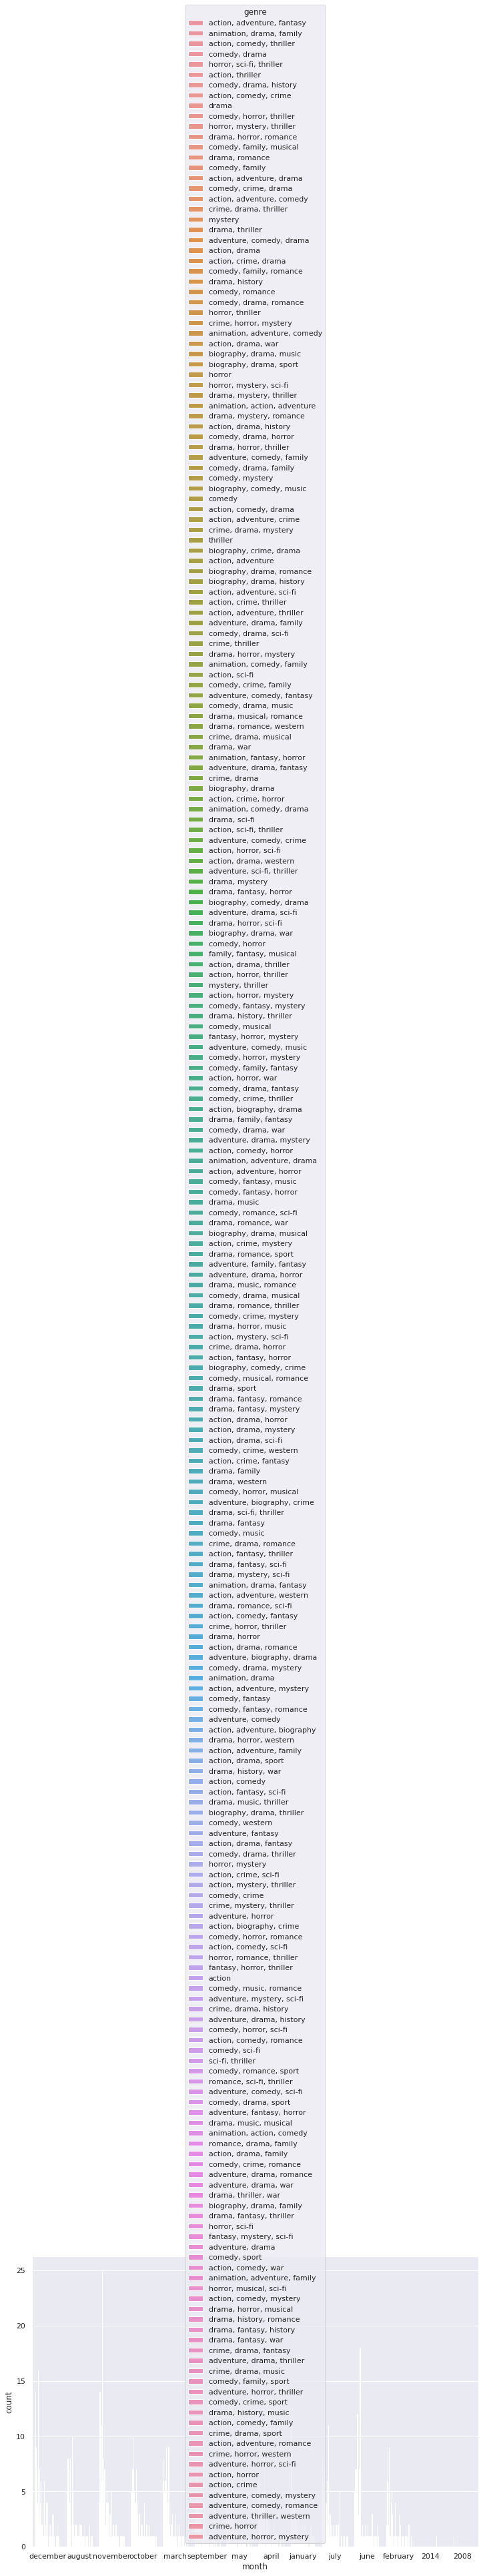

In [47]:
# Bivariate Analysis
sns.set(rc={'figure.figsize':(12,8)})
edu = sns.countplot(x='month', hue='genre', data=df)
#edu.set_xticklabels(['Male','Female'])
plt.show()

In [21]:

report = ProfileReport(df)
report

Output hidden; open in https://colab.research.google.com to view.